In [1]:
import pandas as pd
import numpy as np

# 1. Load correlation matrix
corr_matrix = pd.read_excel('corr_matrix.xlsx', index_col=0)

# 2. Set correlation threshold
THRESHOLD = 0.8

# 3. Prepare context dictionary for football/statistical importance (customize this!)
feature_context = {
    "Goals": "Goals scored or allowed.",
    "Assists": "Assists (final pass before a goal).",
    "Goals + Assists": "Total of Goals and Assists.",
    "Non-Penalty Goals": "Goals scored, excluding penalties.",
    "Penalty Kicks Made": "Number of penalty kicks successfully converted.",
    "Penalty Kicks Attempted": "Total number of penalty kicks taken.",
    "Yellow Cards": "Number of yellow cards received.",
    "Red Cards": "Number of red cards received.",
    "xG: Expected Goals": "Expected Goals: quality of scoring chances, including penalties, but not shootouts.",
    "npxG: Non-Penalty xG": "Non-Penalty Expected Goals: xG excluding penalties.",
    "xAG: Exp. Assisted Goals": "Expected Assisted Goals: xG of shots following a pass by the player.",
    "npxG + xAG": "Sum of Non-Penalty xG and xAG.",
    "Progressive Carries": "Carries moving the ball at least 10 yards closer to the opponent's goal, or into the box.",
    "Progressive Passes": "Completed passes moving the ball at least 10 yards closer to the opponent's goal or into the box.",
    "Progressive Passes Rec": "Completed passes received that move the ball at least 10 yards closer to the opponent's goal or into the box.",
    "Shots Total": "Total shots taken (excluding penalties).",
    "Shots on Target": "Shots directed on target (excluding penalties).",
    "Shots on Target %": "Percentage of shots that are on target.",
    "Goals/Shot": "Ratio of goals to total shots.",
    "Goals/Shot on Target": "Ratio of goals to shots on target.",
    "Average Shot Distance": "Average distance in yards from which shots are taken.",
    "Shots from Free Kicks": "Shots taken directly from free kicks.",
    "npxG/Shot": "Non-Penalty xG per shot.",
    "Goals - xG": "Difference between goals scored and expected goals.",
    "Non-Penalty Goals - npxG": "Difference between non-penalty goals and non-penalty xG.",
    "Passes Completed": "Total completed passes (including crosses, set pieces, etc.).",
    "Passes Attempted": "Total attempted passes (including crosses, set pieces, etc.).",
    "Pass Completion %": "Percentage of passes completed.",
    "Total Passing Distance": "Total yards covered by completed passes in any direction.",
    "Progressive Passing Distance": "Total yards of completed passes towards opponent's goal.",
    "Passes Completed (Short)": "Completed passes between 5 and 15 yards.",
    "Passes Attempted (Short)": "Attempted passes between 5 and 15 yards.",
    "Pass Completion % (Short)": "Percentage of short passes completed.",
    "Passes Completed (Medium)": "Completed passes between 15 and 30 yards.",
    "Passes Attempted (Medium)": "Attempted passes between 15 and 30 yards.",
    "Pass Completion % (Medium)": "Percentage of medium passes completed.",
    "Passes Completed (Long)": "Completed passes over 30 yards.",
    "Passes Attempted (Long)": "Attempted passes over 30 yards.",
    "Pass Completion % (Long)": "Percentage of long passes completed.",
    "xA: Expected Assists": "Expected Assists: probability each completed pass becomes an assist.",
    "Key Passes": "Passes that directly lead to a shot.",
    "Passes into Final Third": "Completed passes into the attacking third of the pitch.",
    "Passes into Penalty Area": "Completed passes into the penalty area.",
    "Crosses into Penalty Area": "Crosses completed into the penalty area.",
    "Live-ball Passes": "Passes played while the ball is in open play.",
    "Dead-ball Passes": "Passes from set pieces: free kicks, corners, goal kicks, throw-ins.",
    "Passes from Free Kicks": "Passes attempted from free kicks.",
    "Through Balls": "Passes played between defenders into open space.",
    "Switches": "Passes that travel more than 40 yards across the width of the pitch.",
    "Crosses": "Crosses from open play.",
    "Throw-ins Taken": "Throw-ins taken by the player.",
    "Corner Kicks": "Corner kicks taken by the player.",
    "Inswinging Corner Kicks": "Inswinging corner kicks taken.",
    "Outswinging Corner Kicks": "Outswinging corner kicks taken.",
    "Straight Corner Kicks": "Straight corner kicks taken.",
    "Passes Offside": "Passes resulting in a teammate being offside.",
    "Passes Blocked": "Passes blocked by the opponent.",
    "Shot-Creating Actions": "The two actions leading directly to a shot (pass, take-on, drawn foul, etc.).",
    "SCA (Live-ball Pass)": "Completed live-ball passes leading to a shot.",
    "SCA (Dead-ball Pass)": "Completed dead-ball passes leading to a shot.",
    "SCA (Take-On)": "Successful take-ons leading to a shot.",
    "SCA (Shot)": "Shots leading to another shot.",
    "SCA (Fouls Drawn)": "Fouls drawn leading to a shot.",
    "SCA (Defensive Action)": "Defensive actions leading to a shot.",
    "Goal-Creating Actions": "The two actions leading directly to a goal.",
    "GCA (Live-ball Pass)": "Completed live-ball passes leading to a goal.",
    "GCA (Dead-ball Pass)": "Completed dead-ball passes leading to a goal.",
    "GCA (Take-On)": "Successful take-ons leading to a goal.",
    "GCA (Shot)": "Shots leading to another goal-scoring shot.",
    "GCA (Fouls Drawn)": "Fouls drawn leading to a goal.",
    "GCA (Defensive Action)": "Defensive actions leading to a goal.",
    "Tackles": "Number of players tackled.",
    "Tackles Won": "Tackles where possession is won.",
    "Tackles (Def 3rd)": "Tackles in the defensive third.",
    "Tackles (Mid 3rd)": "Tackles in the middle third.",
    "Tackles (Att 3rd)": "Tackles in the attacking third.",
    "Dribblers Tackled": "Number of dribblers tackled.",
    "Dribbles Challenged": "Total attempted challenges on dribblers.",
    "% of Dribblers Tackled": "Percentage of dribblers successfully tackled.",
    "Challenges Lost": "Number of unsuccessful attempts to challenge a dribbler.",
    "Blocks": "Blocks made by standing in the ball's path.",
    "Shots Blocked": "Shots blocked.",
    "Passes Blocked": "Passes blocked.",
    "Interceptions": "Interceptions of passes.",
    "Tkl+Int": "Total tackles plus interceptions.",
    "Clearances": "Balls cleared away from goal.",
    "Errors": "Mistakes leading to opponent's shot.",
    "Touches": "Total touches of the ball.",
    "Touches (Def Pen)": "Touches in defensive penalty area.",
    "Touches (Def 3rd)": "Touches in defensive third.",
    "Touches (Mid 3rd)": "Touches in middle third.",
    "Touches (Att 3rd)": "Touches in attacking third.",
    "Touches (Att Pen)": "Touches in attacking penalty area.",
    "Touches (Live-Ball)": "Touches when the ball is in open play.",
    "Take-Ons Attempted": "Attempts to take on a defender while dribbling.",
    "Successful Take-Ons": "Successfully dribbling past a defender.",
    "Successful Take-On %": "Percentage of successful take-ons.",
    "Times Tackled During Take-On": "Number of times tackled during a take-on.",
    "Tackled During Take-On Percentage": "Percentage of times tackled during a take-on.",
    "Carries": "Number of times the player controlled the ball with feet.",
    "Total Carrying Distance": "Total yards the ball was carried.",
    "Progressive Carrying Distance": "Total yards the ball was carried towards opponent's goal.",
    "Carries into Final Third": "Carries into attacking third.",
    "Carries into Penalty Area": "Carries into the penalty area.",
    "Miscontrols": "Number of failed attempts to control the ball.",
    "Dispossessed": "Times player lost the ball after being tackled.",
    "Passes Received": "Passes successfully received.",
    "Fouls Committed": "Fouls committed by the player.",
    "Fouls Drawn": "Fouls drawn by the player.",
    "Offsides": "Times caught offside.",
    "Second Yellow Card": "Second yellow card received (leading to red).",
    "Penalty Kicks Won": "Penalty kicks won by the player.",
    "Penalty Kicks Conceded": "Penalty kicks conceded by the player.",
    "Own Goals": "Own goals scored.",
    "Ball Recoveries": "Number of loose balls recovered.",
    "Aerials Won": "Aerial duels won.",
    "Aerials Lost": "Aerial duels lost.",
    "% of Aerials Won": "Percentage of aerial duels won.",
}


# 4. Identify correlated feature pairs
abs_corr = corr_matrix.abs()
upper = abs_corr.where(np.triu(np.ones(abs_corr.shape), k=1).astype(bool))
high_corr_pairs = [(i, j, upper.loc[i, j]) for i in upper.index for j in upper.columns if pd.notnull(upper.loc[i, j]) and upper.loc[i, j] > THRESHOLD]

# 5. Interactive selection
features_to_remove = set()
for f1, f2, corr_val in high_corr_pairs:
    if f1 in features_to_remove or f2 in features_to_remove:
        continue
    print(f"\nHighly correlated pair: '{f1}' and '{f2}' (correlation = {corr_val:.2f})")
    print(f"Football/statistical context:\n- {f1}: {feature_context.get(f1, 'No context')}\n- {f2}: {feature_context.get(f2, 'No context')}")
    keep = input(f"Which one do you want to KEEP? Enter '1' for {f1}, '2' for {f2}: ")
    if keep == '1':
        features_to_remove.add(f2)
    elif keep == '2':
        features_to_remove.add(f1)
    else:
        print("Invalid input, skipping this pair.")

# 6. Get final feature set
all_features = set(corr_matrix.columns)
final_features = sorted(list(all_features - features_to_remove))

print("\nFinal de-correlated features:")
for f in final_features:
    print(f)



Highly correlated pair: 'Goals' and 'Goals + Assists' (correlation = 0.89)
Football/statistical context:
- Goals: Goals scored or allowed.
- Goals + Assists: Total of Goals and Assists.

Highly correlated pair: 'Goals' and 'Non-Penalty Goals' (correlation = 0.99)
Football/statistical context:
- Goals: Goals scored or allowed.
- Non-Penalty Goals: Goals scored, excluding penalties.

Highly correlated pair: 'Goals' and 'xG: Expected Goals' (correlation = 0.87)
Football/statistical context:
- Goals: Goals scored or allowed.
- xG: Expected Goals: Expected Goals: quality of scoring chances, including penalties, but not shootouts.

Highly correlated pair: 'Goals' and 'npxG: Non-Penalty xG' (correlation = 0.86)
Football/statistical context:
- Goals: Goals scored or allowed.
- npxG: Non-Penalty xG: Non-Penalty Expected Goals: xG excluding penalties.

Highly correlated pair: 'Goals' and 'Shots on Target' (correlation = 0.85)
Football/statistical context:
- Goals: Goals scored or allowed.
- Sho

In [2]:
final_features

['% of Aerials Won',
 '% of Dribblers Tackled',
 'Aerials Lost',
 'Aerials Won',
 'Average Shot Distance',
 'Ball Recoveries',
 'Blocks',
 'Corner Kicks',
 'Crosses',
 'Crosses into Penalty Area',
 'Dead-ball Passes',
 'Dispossessed',
 'Dribbles Challenged',
 'Errors',
 'Fouls Committed',
 'Fouls Drawn',
 'GCA (Dead-ball Pass)',
 'GCA (Defensive Action)',
 'GCA (Fouls Drawn)',
 'GCA (Live-ball Pass)',
 'GCA (Shot)',
 'GCA (Take-On)',
 'Goals',
 'Goals/Shot',
 'Goals/Shot on Target',
 'Interceptions',
 'Key Passes',
 'Minutes',
 'Miscontrols',
 'Non-Penalty Goals - npxG',
 'Offsides',
 'Own Goals',
 'Pass Completion %',
 'Pass Completion % (Long)',
 'Passes Attempted (Long)',
 'Passes Blocked',
 'Passes Offside',
 'Passes Received',
 'Passes from Free Kicks',
 'Passes into Final Third',
 'Penalty Kicks Conceded',
 'Penalty Kicks Made',
 'Penalty Kicks Won',
 'Progressive Carries',
 'Progressive Carrying Distance',
 'Progressive Passing Distance',
 'Red Cards',
 'SCA (Defensive Action)',

In [3]:
import pandas as pd

# Import FBref data
df_pl = pd.read_csv("players_data_clean/PremierLeague_2024_25_clean.csv")
df_ch = pd.read_csv("players_data_clean/EFLChampionship_2024_25_clean.csv")

# Omport EAFC 25 data
df_eafc = pd.read_csv("fc25_dump/PL_CH_EAFC25.csv")

In [4]:
# Concatenate the dataframes for two leagues
df_plch= pd.concat([df_pl, df_ch], ignore_index=True)
df_plch

,Player,Birthdate,League,Club,Footed,Nationality,Position,Minutes,Goals,Assists,...,Fouls Committed,Fouls Drawn,Offsides,Penalty Kicks Won,Penalty Kicks Conceded,Own Goals,Ball Recoveries,Aerials Won,Aerials Lost,% of Aerials Won
0,Mohamed Salah,1992-06-15,PremierLeague,Liverpool,Left,Egypt,Att Mid / Wingers,3371,0.77,0.48,...,0.67,1.04,0.48,0.0,0.0,0.00,2.70,0.24,0.37,39.1
1,Virgil van Dijk,1991-07-08,PremierLeague,Liverpool,Right,Netherlands,Center Backs,3330,0.08,0.03,...,0.46,0.35,0.00,0.0,0.0,0.00,3.11,3.22,1.24,72.1
2,Ryan Gravenberch,2002-05-16,PremierLeague,Liverpool,Right,Netherlands,Midfielders,3160,0.00,0.11,...,1.34,1.48,0.00,0.0,0.0,0.00,5.50,0.74,0.40,65.0
3,Alexis Mac Allister,1998-12-24,PremierLeague,Liverpool,Right,Argentina,Midfielders,2599,0.17,0.17,...,2.15,1.39,0.07,0.0,0.0,0.00,5.13,0.66,1.18,35.8
4,Ibrahima Konaté,1999-05-25,PremierLeague,Liverpool,Right,France,Center Backs,2560,0.04,0.07,...,0.95,0.70,0.00,0.0,0.0,0.00,3.45,2.60,1.02,71.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,Anwar El Ghazi,1995-05-03,EFLChampionship,Cardiff City,Right,Netherlands,Att Mid / Wingers,1175,0.23,0.08,...,1.07,1.38,0.61,0.0,0.0,0.00,3.29,2.07,3.37,38.0
619,Sivert Mannsverk,2002-05-08,EFLChampionship,Cardiff City,Right,Norway,Midfielders,1004,0.00,0.09,...,1.61,0.54,0.00,0.0,0.0,0.00,5.20,2.78,2.78,50.0
620,Yakou Méïte,1996-02-11,EFLChampionship,Cardiff City,Right,Côte d'Ivoire,Att Mid / Wingers,1201,0.22,0.00,...,1.65,1.50,0.37,0.0,0.0,0.00,2.25,4.95,5.10,49.3
621,David Turnbull,1999-07-10,EFLChampionship,Cardiff City,Right,Scotland,Midfielders,826,0.11,0.00,...,1.09,0.11,0.00,0.0,0.0,0.00,4.90,0.65,0.87,42.9


In [6]:
### Merge the two datasets on a fuzzy variable that gets the closest match between the combination of club + player name
#create new fuzzy column for concatenated name on pl_ch dataframe
df_plch['fuzzy_name'] = (df_plch['Player'] + df_plch['Club']).str.replace(' ', '', regex=False).str.lower()
df_plch['fuzzy_name']
#create new fuzzy column for concatenated name on eafc dataframe
df_eafc['fuzzy_name'] = (df_eafc['full_name'] + df_eafc['club_name']).str.replace(' ', '', regex=False).str.lower()
df_eafc['fuzzy_name']
from fuzzywuzzy import process

def get_best_match(name, choices):
    result = process.extractOne(name, choices)
    return result[0]  # matched name only

# Apply matching
df_plch['matched_fuzzy_name'] = df_plch['fuzzy_name'].apply(lambda x: get_best_match(x, df_eafc['fuzzy_name']))

# Merge the matched names
merged_df = pd.merge(df_plch, df_eafc[['fuzzy_name', 'overall']], left_on='matched_fuzzy_name', right_on='fuzzy_name', how='left').drop(columns=['fuzzy_name_y','matched_fuzzy_name'])
merged_df.drop(columns=['fuzzy_name_x'], inplace=True)
merged_df

,Player,Birthdate,League,Club,Footed,Nationality,Position,Minutes,Goals,Assists,...,Fouls Drawn,Offsides,Penalty Kicks Won,Penalty Kicks Conceded,Own Goals,Ball Recoveries,Aerials Won,Aerials Lost,% of Aerials Won,overall
0,Mohamed Salah,1992-06-15,PremierLeague,Liverpool,Left,Egypt,Att Mid / Wingers,3371,0.77,0.48,...,1.04,0.48,0.0,0.0,0.00,2.70,0.24,0.37,39.1,91
1,Virgil van Dijk,1991-07-08,PremierLeague,Liverpool,Right,Netherlands,Center Backs,3330,0.08,0.03,...,0.35,0.00,0.0,0.0,0.00,3.11,3.22,1.24,72.1,90
2,Ryan Gravenberch,2002-05-16,PremierLeague,Liverpool,Right,Netherlands,Midfielders,3160,0.00,0.11,...,1.48,0.00,0.0,0.0,0.00,5.50,0.74,0.40,65.0,84
3,Alexis Mac Allister,1998-12-24,PremierLeague,Liverpool,Right,Argentina,Midfielders,2599,0.17,0.17,...,1.39,0.07,0.0,0.0,0.00,5.13,0.66,1.18,35.8,86
4,Ibrahima Konaté,1999-05-25,PremierLeague,Liverpool,Right,France,Center Backs,2560,0.04,0.07,...,0.70,0.00,0.0,0.0,0.00,3.45,2.60,1.02,71.8,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,Anwar El Ghazi,1995-05-03,EFLChampionship,Cardiff City,Right,Netherlands,Att Mid / Wingers,1175,0.23,0.08,...,1.38,0.61,0.0,0.0,0.00,3.29,2.07,3.37,38.0,73
619,Sivert Mannsverk,2002-05-08,EFLChampionship,Cardiff City,Right,Norway,Midfielders,1004,0.00,0.09,...,0.54,0.00,0.0,0.0,0.00,5.20,2.78,2.78,50.0,68
620,Yakou Méïte,1996-02-11,EFLChampionship,Cardiff City,Right,Côte d'Ivoire,Att Mid / Wingers,1201,0.22,0.00,...,1.50,0.37,0.0,0.0,0.00,2.25,4.95,5.10,49.3,69
621,David Turnbull,1999-07-10,EFLChampionship,Cardiff City,Right,Scotland,Midfielders,826,0.11,0.00,...,0.11,0.00,0.0,0.0,0.00,4.90,0.65,0.87,42.9,71


In [7]:
# Define the columns you always want at the front
identifier_cols = [
    "Player", "Birthdate", "League", "Club", "Footed", "Nationality", "Position"
]

# Prepend identifier_cols to your final_features, avoiding duplicates
all_features = identifier_cols + [f for f in final_features if f not in identifier_cols]

# Subset the DataFrame with this new ordered list
df_plch = merged_df[all_features]

df_plch

,Player,Birthdate,League,Club,Footed,Nationality,Position,% of Aerials Won,% of Dribblers Tackled,Aerials Lost,...,Tackles (Mid 3rd),Take-Ons Attempted,Through Balls,Tkl+Int,Touches (Att 3rd),Touches (Def 3rd),Yellow Cards,npxG + xAG,npxG/Shot,overall
0,Mohamed Salah,1992-06-15,PremierLeague,Liverpool,Left,Egypt,Att Mid / Wingers,39.1,47.1,0.37,...,0.13,3.66,0.51,0.80,29.88,2.59,0.03,0.87,0.15,91
1,Virgil van Dijk,1991-07-08,PremierLeague,Liverpool,Right,Netherlands,Center Backs,72.1,59.1,1.24,...,0.51,0.14,0.03,2.54,4.49,35.62,0.14,0.08,0.08,90
2,Ryan Gravenberch,2002-05-16,PremierLeague,Liverpool,Right,Netherlands,Midfielders,65.0,57.1,0.40,...,0.83,2.31,0.23,3.67,14.58,14.50,0.17,0.12,0.06,84
3,Alexis Mac Allister,1998-12-24,PremierLeague,Liverpool,Right,Argentina,Midfielders,35.8,52.9,1.18,...,1.77,1.45,0.21,4.05,22.06,9.83,0.21,0.26,0.07,86
4,Ibrahima Konaté,1999-05-25,PremierLeague,Liverpool,Right,France,Center Backs,71.8,71.4,1.02,...,0.46,0.21,0.04,2.00,4.18,32.63,0.18,0.09,0.09,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,Anwar El Ghazi,1995-05-03,EFLChampionship,Cardiff City,Right,Netherlands,Att Mid / Wingers,38.0,42.9,3.37,...,0.31,2.60,0.08,0.77,18.77,4.29,0.00,0.48,0.14,73
619,Sivert Mannsverk,2002-05-08,EFLChampionship,Cardiff City,Right,Norway,Midfielders,50.0,38.1,2.78,...,0.54,0.90,0.27,2.96,11.12,11.65,0.36,0.13,0.03,68
620,Yakou Méïte,1996-02-11,EFLChampionship,Cardiff City,Right,Côte d'Ivoire,Att Mid / Wingers,49.3,42.1,5.10,...,0.67,2.32,0.00,1.80,14.31,3.22,0.07,0.32,0.08,69
621,David Turnbull,1999-07-10,EFLChampionship,Cardiff City,Right,Scotland,Midfielders,42.9,53.3,0.87,...,0.65,0.44,0.11,2.51,22.12,14.49,0.22,0.14,0.02,71


In [13]:
# Compute correlation matrix of numerical columns
corr_matrix = df_plch.select_dtypes(include=['number']).corr()

# Extract strongly correlated pairs
strong_pairs = []

for col in corr_matrix.columns:
    for idx in corr_matrix.index:
        if col != idx:
            corr_value = corr_matrix.loc[idx, col]
            if abs(corr_value) > 0.8:
                pair = tuple(sorted((idx, col)))
                if pair not in strong_pairs:
                    strong_pairs.append(pair)

# Create a dataframe with these strong correlations
strong_corr_df = pd.DataFrame([
    {'Feature 1': pair[0], 'Feature 2': pair[1], 'Correlation': corr_matrix.loc[pair]}
    for pair in strong_pairs
])

# Display results clearly
strong_corr_df.sort_values(by='Correlation', ascending=False)

,Feature 1,Feature 2,Correlation
2,Progressive Passing Distance,Touches (Def 3rd),0.868897
1,Progressive Carries,Take-Ons Attempted,0.822348
0,Key Passes,Touches (Att 3rd),0.820036


In [15]:
# List of substrings or exact column names to remove
cols_to_drop = [
    'Aerial Lost',
    'Corner Kicks',
    'Average Shot Distance',
    'Crosses',
    'Goals/Shot on Target',
    'Interceptions',
    'Minutes',
    'Non-Penalty Goals - npxG',
    'Offsides',
    'Pass Completion % (Long)',
    'Passes Offside',
    'Passes from Free Kicks',
    'Penalty Kicks Made',
    'Penalty Kicks Won',
    'Progressive Carries',
    'Second Yellow Card',
    'Shots from Free Kicks',
    'Straight Corner Kicks',
    'npxG/Shot'
]

df_plch = df_plch.drop(columns=[col for col in cols_to_drop if col in merged_df.columns])

In [16]:
df_plch

,Player,Birthdate,League,Club,Footed,Nationality,Position,% of Aerials Won,% of Dribblers Tackled,Aerials Lost,...,Tackles (Att 3rd),Tackles (Mid 3rd),Take-Ons Attempted,Through Balls,Tkl+Int,Touches (Att 3rd),Touches (Def 3rd),Yellow Cards,npxG + xAG,overall
0,Mohamed Salah,1992-06-15,PremierLeague,Liverpool,Left,Egypt,Att Mid / Wingers,39.1,47.1,0.37,...,0.24,0.13,3.66,0.51,0.80,29.88,2.59,0.03,0.87,91
1,Virgil van Dijk,1991-07-08,PremierLeague,Liverpool,Right,Netherlands,Center Backs,72.1,59.1,1.24,...,0.05,0.51,0.14,0.03,2.54,4.49,35.62,0.14,0.08,90
2,Ryan Gravenberch,2002-05-16,PremierLeague,Liverpool,Right,Netherlands,Midfielders,65.0,57.1,0.40,...,0.37,0.83,2.31,0.23,3.67,14.58,14.50,0.17,0.12,84
3,Alexis Mac Allister,1998-12-24,PremierLeague,Liverpool,Right,Argentina,Midfielders,35.8,52.9,1.18,...,0.55,1.77,1.45,0.21,4.05,22.06,9.83,0.21,0.26,86
4,Ibrahima Konaté,1999-05-25,PremierLeague,Liverpool,Right,France,Center Backs,71.8,71.4,1.02,...,0.07,0.46,0.21,0.04,2.00,4.18,32.63,0.18,0.09,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,Anwar El Ghazi,1995-05-03,EFLChampionship,Cardiff City,Right,Netherlands,Att Mid / Wingers,38.0,42.9,3.37,...,0.15,0.31,2.60,0.08,0.77,18.77,4.29,0.00,0.48,73
619,Sivert Mannsverk,2002-05-08,EFLChampionship,Cardiff City,Right,Norway,Midfielders,50.0,38.1,2.78,...,0.09,0.54,0.90,0.27,2.96,11.12,11.65,0.36,0.13,68
620,Yakou Méïte,1996-02-11,EFLChampionship,Cardiff City,Right,Côte d'Ivoire,Att Mid / Wingers,49.3,42.1,5.10,...,0.30,0.67,2.32,0.00,1.80,14.31,3.22,0.07,0.32,69
621,David Turnbull,1999-07-10,EFLChampionship,Cardiff City,Right,Scotland,Midfielders,42.9,53.3,0.87,...,0.33,0.65,0.44,0.11,2.51,22.12,14.49,0.22,0.14,71


/Users/ghalichraibi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


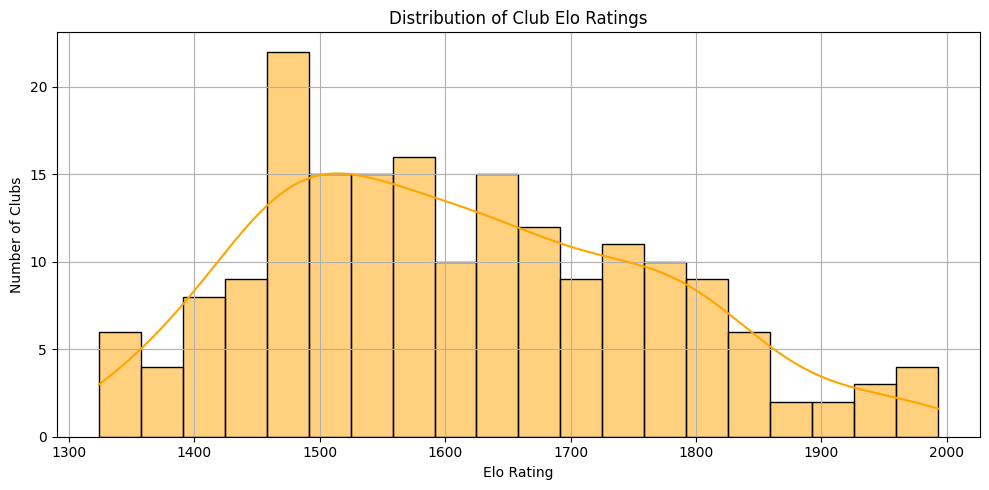

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Import Elo ratings data
elo_df = pd.read_csv("elo_clubs/Elo_Club_VF.csv", sep=";")

# Plot the distribution of Elo ratings
plt.figure(figsize=(10, 5))
sns.histplot(elo_df["Elo"], bins=20, kde=True, color="orange", edgecolor="black")
plt.title("Distribution of Club Elo Ratings")
plt.xlabel("Elo Rating")
plt.ylabel("Number of Clubs")
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
# Apply fuzzy matching to club names with the same 
df_plch["Club_fuzzy"] = df_plch["Club"].apply(
    lambda x: get_best_match(x, elo_df["Club"].unique())
)

# Merge the matched names
final_df = pd.merge(df_plch, elo_df, left_on='Club_fuzzy', right_on='Club', how='left')
final_df.drop(columns=['Club_fuzzy', 'Club_y'], inplace=True)

In [20]:
final_df.to_csv("plch_uncorr_elo.csv", index=False)